#Setup

In [ ]:
#import libraries
import numpy as np
import os
from tqdm import tqdm #progress bar
from skimage.transform import resize
import matplotlib.pyplot as plt

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#set work path
project_path = "/content/drive/My Drive/DATASCI210/"

In [ ]:
os.listdir(project_path)

['Capstone project pitch - Recycling.gslides',
 'Brainstorming - Capstone Project.gdoc',
 'Team Process Agreement.gdoc',
 'Individual Work',
 'Project Plan template.gdoc',
 'capstone_project',
 'images_set2',
 'images_set1',
 '(to be updated) fine_tune_cnn.ipynb',
 'image_file_processing.ipynb']

#Image Set 1: Trash

Link: https://www.kaggle.com/datasets/alistairking/recyclable-and-household-waste-classification

Further processed by manual selection on selected class: aluminium_can, paper_cup

In [ ]:
#check files in dir
img_set1_path = project_path+"capstone_project/image_data/"

os.listdir(img_set1_path)

['aluminum_can', 'paper_cup']

In [ ]:
#loop through folders, open image > rescale > save image and label as arrays

imgs = []
labels = []

for set1_cat in os.listdir(img_set1_path):
  print("Processing image folder for class: "+ set1_cat)
  for file in tqdm(os.listdir(img_set1_path+set1_cat)):
    if file.endswith(".jpg") or file.endswith(".png"):
      img = plt.imread(img_set1_path+set1_cat+"/"+file)
      img_resized = resize(img, (128,128,3))
      imgs.append((img_resized*255).astype('uint8'))
      labels.append(set1_cat)

Processing image folder for class: aluminum_can


100%|██████████| 70/70 [00:00<00:00, 89.00it/s]


Processing image folder for class: paper_cup


100%|██████████| 59/59 [00:00<00:00, 89.44it/s]


In [ ]:
x1 = np.array(imgs)
y1 = np.array(labels).reshape((len(labels),1))

(129, 128, 128, 3)
(129, 1)
['aluminum_can']


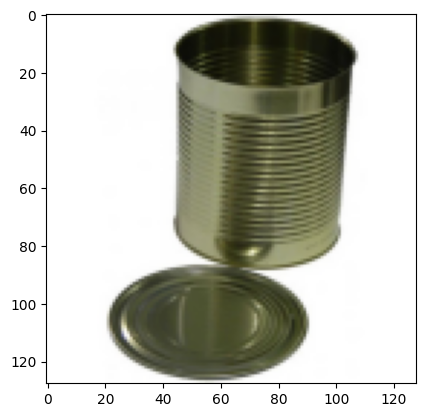

In [ ]:
#check
print(x1.shape)
print(y1.shape)

print(y1[55])
plt.imshow(x1[55])

#Image Set 2: Recyclable

Link: https://web.cecs.pdx.edu/~singh/rcyc-web/dataset.html

In [ ]:
#code to unpack data
def unpickle(file):
  import numpy as np
  with open(file, 'rb') as fo:
      data = np.load(file)
  x_train, y_train, x_test, y_test = data['x_train'], data['y_train'], data['x_test'], data['y_test']
  return x_train, y_train, x_test, y_test

In [ ]:
#check files in dir
os.listdir(project_path+"images_set2")

['recycle_data_shuffled.npz', 'recycled_32_test.npz', 'recycled_32_train.npz']

In [ ]:
img_file = project_path + "images_set2/" + "recycle_data_shuffled.npz"

In [ ]:
x_train, y_train, x_test, y_test = unpickle(img_file)

(11500, 128, 128, 3)


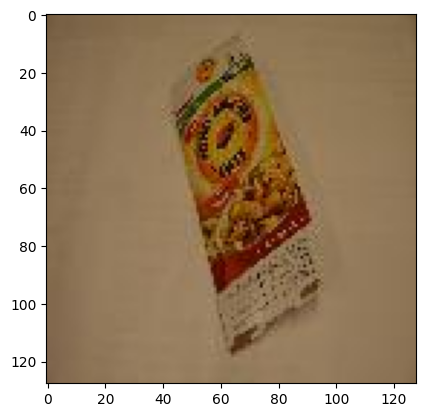

In [ ]:
x2 = np.vstack((x_train, x_test))

#check
print(x2.shape)
plt.imshow(x2[0])

In [ ]:
y2 = np.vstack((y_train, y_test)).astype('object')

#replace index with text labels
label_dict = {0:"boxes",
              1:"glass_bottle",
              2:"soda_can",
              3:"crushed_soda_can",
              4:"plastic_bottle"}

for key, value in label_dict.items():
  y2[y2==key]=value

#check
y2

array([['boxes'],
       ['soda_can'],
       ['crushed_soda_can'],
       ...,
       ['soda_can'],
       ['plastic_bottle'],
       ['glass_bottle']], dtype=object)

In [ ]:
#take only certain classes

cat_to_keep = ['boxes','soda_can','plastic_bottle','glass_bottle']

keep_indice = np.flatnonzero(np.isin(y2, cat_to_keep))

x2 = np.take(x2, keep_indice, axis=0)
y2 = np.take(y2, keep_indice, axis=0)

In [ ]:
#take n sample per class

sample_per_class = 100
sampled = []

for cat in cat_to_keep:
  sample_indice = np.random.choice(np.where(y2==cat)[0], sample_per_class, replace=False)
  sampled.extend(list(sample_indice))

x2 = np.take(x2, sampled, axis=0)
y2 = np.take(y2, sampled, axis=0)

(400, 128, 128, 3)
(400, 1)
['soda_can']


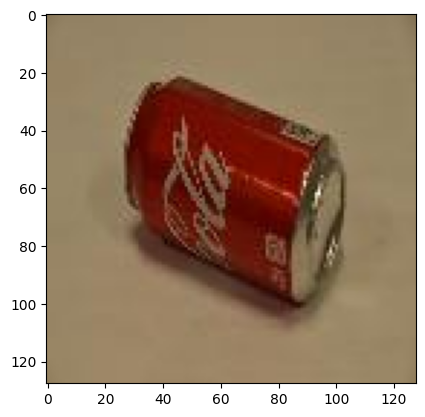

In [ ]:
#check
print(x2.shape)
print(y2.shape)

print(y2[123])
plt.imshow(x2[123])

#Image Set 3: Others

Random 80 images from set 1

In [ ]:
#check files in dir
img_set3_path = project_path+"capstone_project/image_data/others"

len(os.listdir(img_set3_path))

80

In [ ]:
#loop through folders, open image > rescale > save image and label as arrays

imgs = []
labels = []

for file in tqdm(os.listdir(img_set3_path)):
  if file.endswith(".jpg") or file.endswith(".png"):
    img = plt.imread(img_set3_path+"/"+file)
    img_resized = resize(img, (128,128,3))
    imgs.append((img_resized*255).astype('uint8'))
    labels.append("others")

100%|██████████| 80/80 [00:25<00:00,  3.13it/s]


In [ ]:
x3 = np.array(imgs)
y3 = np.array(labels).reshape((len(labels),1))

(80, 128, 128, 3)
(80, 1)
['others']


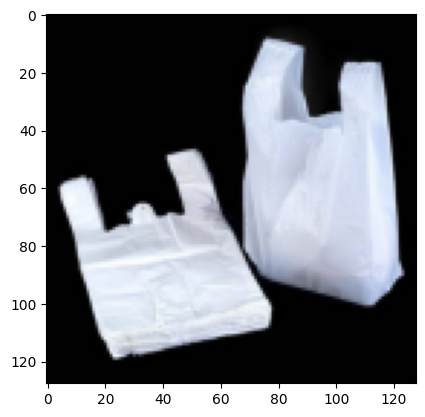

In [ ]:
#check
print(x3.shape)
print(y3.shape)

print(y3[55])
plt.imshow(x3[55])

#Combine data and save

['aluminum_can']


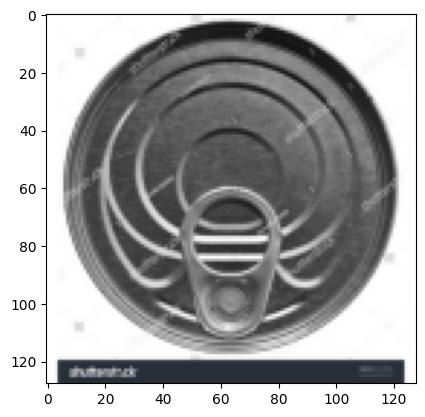

In [ ]:
a = np.load(project_path+"capstone_project/image_data/data_x.npy")
b = np.load(project_path+"capstone_project/image_data/data_y.npy", allow_pickle=True)

#check one
print(b[0])
plt.imshow(a[0])

In [ ]:
#combine datasets
x = np.vstack((a, x3))
y = np.vstack((b, y3))

(609, 128, 128, 3)
(609, 1)
['plastic_bottle']


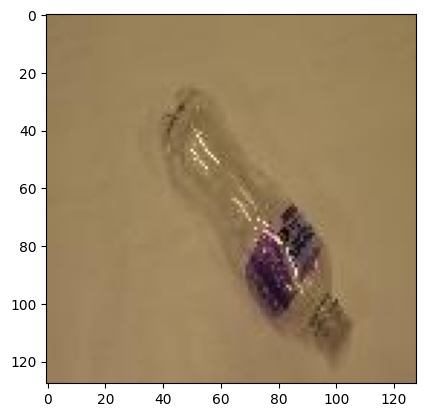

In [ ]:
#check
print(x.shape)
print(y.shape)

print(y[400])
plt.imshow(x[400])

In [ ]:
#saving data and label arrays
np.save(open(project_path+"capstone_project/image_data/data_x_2.npy", 'wb'), x)
np.save(open(project_path+"capstone_project/image_data/data_y_2.npy", 'wb'), y)